2. Perform the following operations using R/Python on the data sets:
a) Compute and display summary statistics for each feature available in the dataset. (e.g.
minimum value, maximum value, mean, range, standard deviation, variance and
percentiles
b) Illustrate the feature distributions using histogram.
c) Data cleaning, Data integration, Data transformation, Data model building (e.g.Classification)

# **Assignment 2**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("/content/admission.csv")

In [ ]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
dataset.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
dataset.dtypes

,0
Serial No.,int64
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Research'] = le.fit_transform(dataset['Research'])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset.iloc[:, 1:8] = sc.fit_transform(dataset.iloc[:, 1:8])

<ipython-input-14-2eea495b8885>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.81923762  0.66714832 -0.0418297   0.48990382 -0.21907421  1.19888185
  0.40128156 -0.75080773 -1.28254125  0.57852607  0.75577058  0.93301508
  1.02163734 -0.83942999 -0.48494097 -0.21907421  0.04679255  0.22403706
  0.1354148  -1.193919   -0.39631872  0.75577058  1.02163734  1.55337086
  1.73061537  2.08510438  0.48990382 -1.63703027 -1.90289703 -0.57356322
 -1.45978576  0.93301508  1.90785987  2.08510438  1.2875041   0.31265931
 -1.54840801 -1.45978576 -1.10529675 -0.83942999 -0.75080773 -0.0418297
 -0.30769646  1.37612635  0.84439283  0.48990382  1.11025959  1.99648213
  0.40128156  0.93301508 -0.30769646 -0.39631872  1.55337086  0.66714832
  0.48990382  0.31265931 -0.0418297  -1.63703027 -1.45978576 -0.48494097
 -0.66218548 -0.83942999 -1.10529675 -0.13045196  0.75577058  0.75577058
  0.93301508 -0.0418297   0.1354148   1.02163

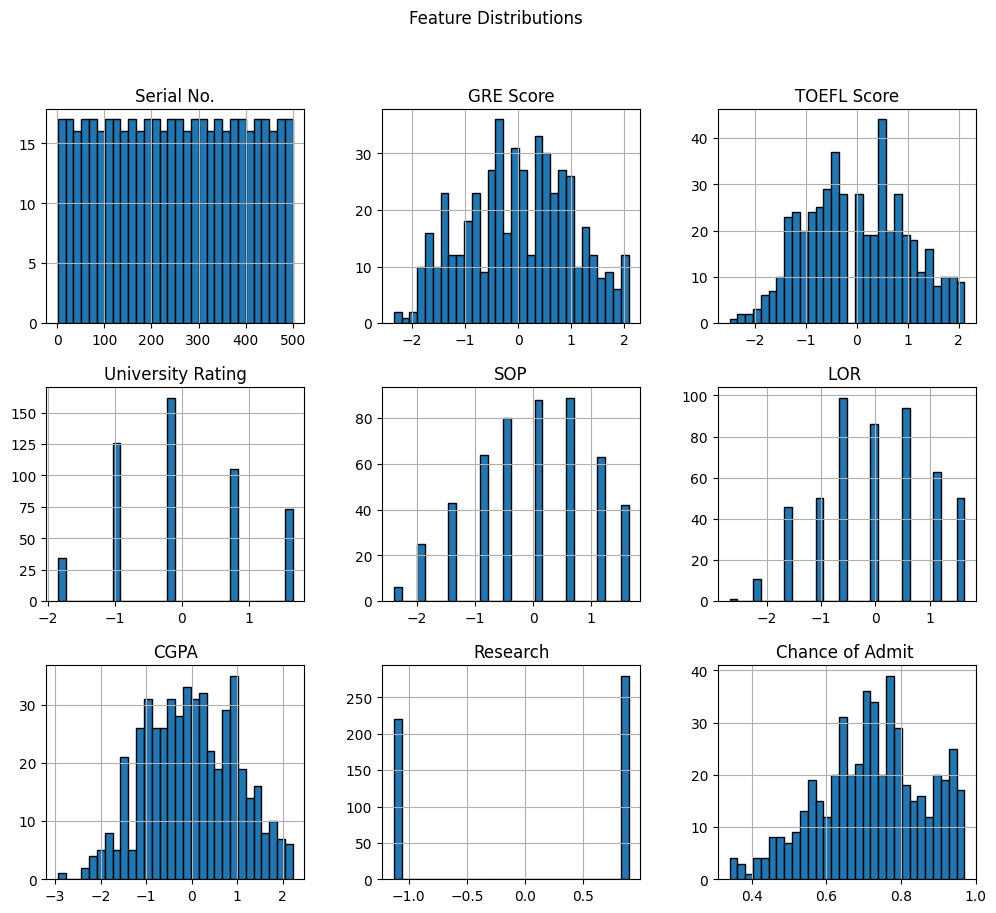

In [ ]:
dataset.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

In [ ]:
X = dataset.iloc[:, 1:8].values
y = dataset.iloc[:, 8].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = regressor.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)